In [1]:
import pandas as pd #for handling data
import numpy as np #for handling data matrix
import matplotlib.pyplot as plt #for plotting
import matplotlib #for plotting
from sklearn.preprocessing import StandardScaler #for scaling features
from sklearn.model_selection import train_test_split #for creating train and test sets
from sklearn.linear_model import SGDClassifier #classifier 
from sklearn.metrics import precision_score, recall_score, confusion_matrix #evaluation measures
from sklearn.decomposition import PCA #for Principle Component Analysis of the features set
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 


In [2]:
DF = pd.read_csv('sEMG_Features.csv')
DF = DF[['0_RMS','1_RMS','2_RMS','3_RMS','4_RMS','5_RMS','6_RMS','7_RMS','group']].copy()
DF = DF.sample(frac=1, random_state =42)
DF

0_RMS     1_RMS     2_RMS     3_RMS     4_RMS     5_RMS     6_RMS  \
505    0.000037  0.000062  0.000092  0.000166  0.000215  0.000101  0.000045   
13061  0.000103  0.000040  0.000032  0.000042  0.000096  0.000055  0.000045   
25267  0.000212  0.000073  0.000027  0.000095  0.000169  0.000101  0.000057   
15244  0.000011  0.000021  0.000015  0.000014  0.000009  0.000005  0.000005   
25197  0.000156  0.000062  0.000078  0.000069  0.000111  0.000194  0.000116   
...         ...       ...       ...       ...       ...       ...       ...   
29802  0.000041  0.000027  0.000010  0.000022  0.000082  0.000065  0.000017   
5390   0.000032  0.000057  0.000076  0.000225  0.000199  0.000091  0.000035   
860    0.000010  0.000015  0.000012  0.000010  0.000020  0.000016  0.000003   
15795  0.000026  0.000011  0.000020  0.000031  0.000077  0.000035  0.000016   
23654  0.000018  0.000006  0.000008  0.000016  0.000025  0.000012  0.000007   

          7_RMS  group  
505    0.000028      4  
13061  0.000109      3  
25267  0.000038      3  
15244  0.000005      1  
25197  0.000128      2  
...         ...    ...  
29802  0.000038      6  
5390   0.000026      4  
860    0.000006      1  
15795  0.000007      5  
23654  0.000037      3  

[29876 rows x 9 columns]

In [3]:
y = DF.pop('group').values
X = DF.values

In [4]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify =y)

In [6]:
pca = PCA(n_components=3)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

In [7]:
sgd_clf = SGDClassifier(loss='log', alpha=0.001, max_iter=5000, penalty='l1', tol=1e-5) 
sgd_clf.fit(X_train_p, y_train)
y_train_pred = sgd_clf.predict(X_train_p) #predecting the values for train data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_pred, average='weighted'),recall_score(y_train, y_train_pred, average='weighted')))


Precision score: 0.6837993493266356, Recall score: 0.6859463560494489


In [8]:
x=[]
y=[]
z=[]
for i in range (0,len(X_train_p)):
  x.append(X_train_p[i][0])
  y.append(X_train_p[i][1])
  z.append(X_train_p[i][2])

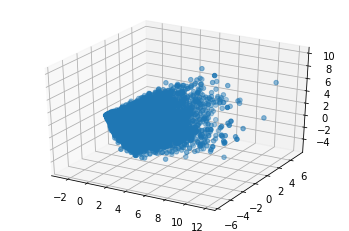

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter3D(x,y,z)
plt.show()

In [10]:
df = pd.DataFrame({'group': y_train, 'x':x, 'y':y, 'z':z})

In [11]:
df

group         x         y         z
0          5 -0.540607 -0.126776  0.668364
1          2  5.557861 -0.632530  1.275113
2          3  7.086657  5.143889  1.517270
3          6 -1.190268  0.614374 -0.387369
4          3  2.278572  2.690461 -0.675482
...      ...       ...       ...       ...
22402      6 -0.739088 -0.008351 -1.062757
22403      5 -1.171149  0.672833  0.851814
22404      5  1.465920  0.373308  2.248095
22405      3 -0.102733  0.453972  0.959402
22406      4  2.686085 -3.459824 -0.212479

[22407 rows x 4 columns]

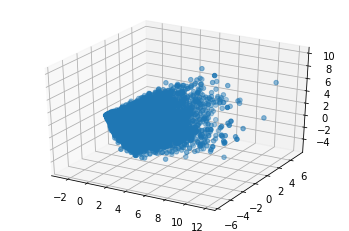

In [12]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'], df['y'], df['z'])


In [13]:
groups = df.groupby('group')

In [14]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(fig)

for group in groups:
    ax.scatter(group[1].x, group[1].y, group[1].z, marker='o')
plt.show()

In [15]:
df.to_csv('pca.csv',index=False)

In [16]:
! cat pca.csv

group,x,y,z
5,-0.5406066061956888,-0.12677567693466585,0.6683637271947173
2,5.557861274900165,-0.6325302253756447,1.2751125018356457
3,7.086657074320442,5.143888619254181,1.5172698608366202
6,-1.1902682628856995,0.6143743139084281,-0.38736882633246594
3,2.278572282752815,2.690461270871923,-0.675481520010866
3,2.3016734047601677,3.182953859344303,-0.3977628042712863
1,-2.1523077815912055,0.0446702338582263,0.36751742789654623
6,-0.4055401027615133,1.0356924674188699,-1.175194972448591
1,-2.2355873132176227,0.013682341722383778,0.16450241673615323
2,-0.22737118195518727,0.8564959370411616,-0.47644799866679854
5,-0.5067150075230639,-1.6073253177828426,-0.144555809483672
1,-2.281511657831394,-0.12411962481095896,0.1370990014681008
1,-2.229402091759313,0.09794147903035606,0.36836175021604195
3,-0.24591246603833236,1.666309951178296,-0.49790219536625036
4,0.26053368552436595,-1.987431980631671,0.2719800278889384
1,-2.199651379007665,-0.044064225297132366,0.20455989484114553
6,0.2025034328085

2,-1.2682454454138008,0.19792757313752984,0.13480779097804949
5,-0.28230401133906063,-1.5650261771983944,1.2670800142267744
3,0.6280311448505488,1.7243721408437451,0.2907808536165471
6,4.861793867927731,4.275810428466828,-1.1657559224836285
4,0.6645117694304649,-0.15312652744760147,0.34045925411940936
4,-0.050904361191245175,-1.1408993973481867,0.08640520817248513
6,-1.6655902604631623,0.43286471172517776,-0.06071765382776684
3,0.11133745636768529,1.0171070520754706,-0.5711869853840724
6,-0.1529020865772965,-1.1461242769740527,1.8417501380567558
6,0.2889753675914725,2.1146873274974154,-0.3308216868659847
6,0.9848416046339394,1.3569766447218117,-0.4607945993007774
1,-1.6020533712875162,-0.09704120949388256,0.09563338278660108
6,-0.44608617390389854,-0.14131511109788397,-1.5028127184119109
5,-1.3027624910865963,0.2579164560989104,0.26086398138804917
1,-2.2061975502785556,0.16519144278879194,0.3636826027337335
2,-1.3127036496710653,0.10555986525479444,0.22793545069695173
5,-1.426333734696

6,0.4222583333264387,0.15697709399051815,-1.5284561952811269
6,0.37956096810675727,-0.15477071887375787,-2.803902193645968
5,0.3517068845395523,-1.376132201491403,0.8304506480945897
5,-0.6920734918866278,-1.3162644620292705,0.2599803539104238
6,-1.8000649289207409,0.4569029315890918,-0.3355546990881796
3,0.0319974314478188,-0.02508972055999562,-0.4266805979740927
5,-1.5616638943483572,-0.3372080688526842,0.3538925206625039
1,-2.3498143213916496,0.2262112236679129,0.1306066025988522
3,-2.0189965556452463,0.559411901888584,0.4378835946407243
1,-2.26201034853494,0.22075218250457732,0.26877388607133684
4,-0.3882398773928682,-1.492104358451993,0.2216482056732223
1,-2.2085924993728714,0.15910491977407737,0.16995111497683613
6,0.8408731204748103,1.2641515251963633,-0.8989288646199806
4,0.23675525194326724,-0.7677922450172621,-0.35781469556949064
4,1.1383695061567354,-0.7314423252521223,-1.6699966663467327
2,-0.5175262076819772,0.8678508797166979,0.2272109961572754
4,1.168891260251401,-2.56614

In [17]:
group[1]

group         x         y         z
3          6 -1.190268  0.614374 -0.387369
7          6 -0.405540  1.035692 -1.175195
16         6  0.202503  0.574795  0.146560
17         6 -1.762448  0.646390 -0.567885
39         6 -0.264652  0.394931 -1.145920
...      ...       ...       ...       ...
22388      6 -1.118357  0.513316 -0.791573
22393      6 -0.568115  1.047501  0.082519
22397      6  0.274512  0.192487 -1.611688
22401      6  0.941282 -0.175275 -2.497551
22402      6 -0.739088 -0.008351 -1.062757

[3781 rows x 4 columns]

In [18]:
sgd_clf.intercept_

array([-17.56944062,  -1.83330989,  -2.56095059,  -3.15209821,
        -2.39032324,  -2.45493485])

In [19]:
z = lambda x,y: (-sgd_clf.intercept_[0]-sgd_clf.coef_[0][0]*x-sgd_clf.coef_[0][1]*y) / sgd_clf.coef_[0][2]


In [20]:

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x, y, z(x,y))
plt.show()

In [21]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(sgd_clf, open(filename, 'wb'))

In [22]:
loaded_model = pickle.load(open(filename, 'rb'))


In [23]:
loaded_model.intercept_

array([-17.56944062,  -1.83330989,  -2.56095059,  -3.15209821,
        -2.39032324,  -2.45493485])

In [24]:
from joblib import dump

dump(sgd_clf, 'sgf_clf.joblib')

['sgf_clf.joblib']